In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/housing/Housing.csv')

# Check the data
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
# Check for categorical columns
print(df.dtypes)

# If there are categorical features, convert them using get_dummies
df = pd.get_dummies(df, drop_first=True)

# Final check
print(df.head())


price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False        

In [3]:
# Features and Target
X = df.drop('price', axis=1)
y = df['price']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (436, 13)
Testing set size: (109, 13)


Fit Linear Regression Model

In [4]:
# Create Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


Evaluate the Model

In [5]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R² Score
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 970043.40
MSE: 1754318687330.66
R² Score: 0.65


 Plot Regression Line

In [10]:
# Train only on 'area' feature
X = df[['area']]    # Single feature (notice the double brackets)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


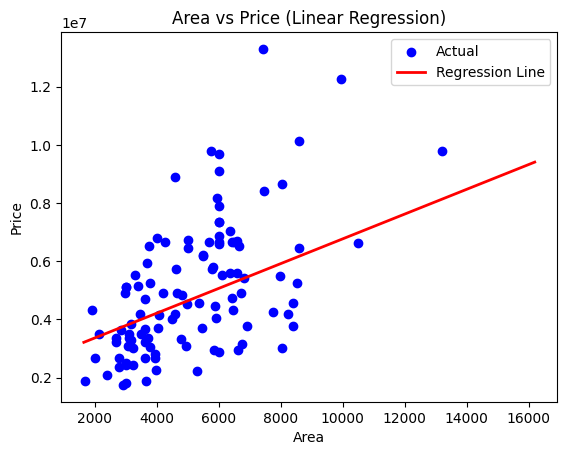

In [11]:
import numpy as np

# Create a smooth sequence of Area values
area_range = np.linspace(X['area'].min(), X['area'].max(), 100).reshape(-1,1)

# Predict prices for this smooth range
price_predicted = model.predict(area_range)

# Scatter actual test points
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')

# Plot the regression line (smooth)
plt.plot(area_range, price_predicted, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price (Linear Regression)')
plt.legend()
plt.show()


Interpret Coefficients

In [7]:
# Intercept
print("Intercept (b0):", model.intercept_)

# Coefficients for each feature
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df)


Intercept (b0): 260032.35760741215
                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
